In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
from scipy.stats import zscore

# Soru 1:
See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?

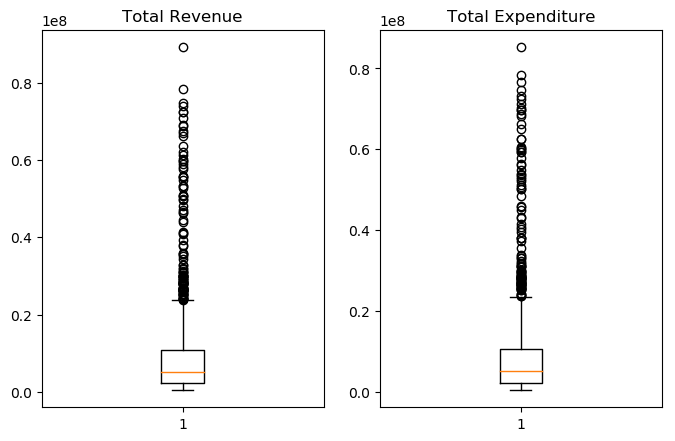

Threshold values of Revenue: 1
Number of zscores revenue outliers: 134
Number of zscores expenditure outliers: 134
--------------------------------------------------
Threshold values of Revenue: 2
Number of zscores revenue outliers: 52
Number of zscores expenditure outliers: 53
--------------------------------------------------
Threshold values of Revenue: 3
Number of zscores revenue outliers: 37
Number of zscores expenditure outliers: 38
--------------------------------------------------
Threshold values of Revenue: 4
Number of zscores revenue outliers: 21
Number of zscores expenditure outliers: 23
--------------------------------------------------


In [6]:
states_all=pd.read_csv("states_all.csv")
states_all.head()

# Aykırı değişkenleri tespit etmenin 2 yöntemi vardır: Görselleştirme ya da 
# istatistiksel analiz metotlarıdır. 

# GÖRSELLEŞTİRME METODU İLE;
plt.figure(figsize=(8,5),dpi=100)

plt.subplot(1,2,1)
plt.title("Total Revenue")
plt.boxplot(states_all["TOTAL_REVENUE"].dropna(),whis=1.5)

plt.subplot(1,2,2)
plt.title("Total Expenditure")
plt.boxplot(states_all["TOTAL_EXPENDITURE"].dropna(),whis=1.5)

plt.show()

# 1.5 whisker eşiği her iki kolon için de outliers değerler vardır. Whiskers'ı
# arttırmak outliers sayısını azaltmaktadır.


# İSTATİSTİKSEL ANALİZ İLE;
zscores_revenue=zscore(states_all["TOTAL_REVENUE"].dropna())
zscores_expenditure=zscore(states_all["TOTAL_EXPENDITURE"].dropna())

for threshold in range(1,5):
    print("Threshold values of Revenue: {}".format(threshold))
    print("Number of zscores revenue outliers: {}".format(len((np.where(zscores_revenue>threshold)[0]))))
    print("Number of zscores expenditure outliers: {}".format(len((np.where(zscores_expenditure>threshold)[0]))))
    print("-----"*10)
    
# Hem görsel hem de istatistiksel analiz metoduyla aykırı değerleri göstermiş olduk.

# Soru 2:
If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

In [4]:
from scipy.stats.mstats import winsorize

Revenue [ 2678885.  1049591.  3258079. ...  3391579. 11697466.  2044669.]
Expenditure [ 2653798.   972488.  3401580. ...  3366566. 11787535.  2034229.]


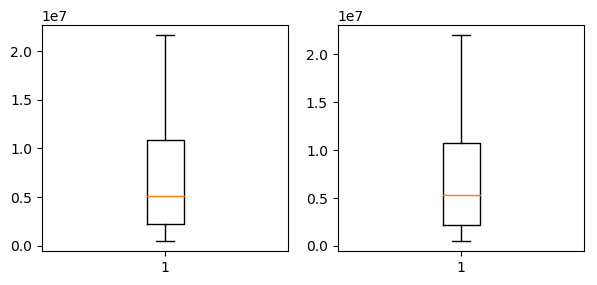

In [7]:
# Aykırı değerleri elimine etmek için 3 yöntem bulunmaktadır:
# 1. silebiliriz ()çok tercih edilmez
# 2. winsorizing metodu ile sınırlayabiliriz.
# 3. log yöntemi veya karekök ile dönüştürebiliriz.

# WINSORIZING METODU İLE SINIRLANDIRMA:
# Boxplot grafiğinden de anlaşıldığı gibi aykırı değerler tek yönlü ve yüksek.
# Dolayısıyla tek yönlü winsorizing uygulayalım.

from scipy.stats.mstats import winsorize

revenue=winsorize(states_all["TOTAL_REVENUE"].dropna(), (0,0.10))
expenditure=winsorize(states_all["TOTAL_EXPENDITURE"].dropna(), (0,0.10))

print("Revenue",revenue)
print("Expenditure",expenditure)

plt.figure(figsize=(7,3),dpi=100)
plt.subplot(1,2,1)
plt.boxplot(revenue, whis=1.5)
# whiskers 0.5 olunca outliers değerler var; 1.5 olunca da outliers değerlerden
# kurtuluruz.

plt.subplot(1,2,2)
plt.boxplot(expenditure)
plt.show()

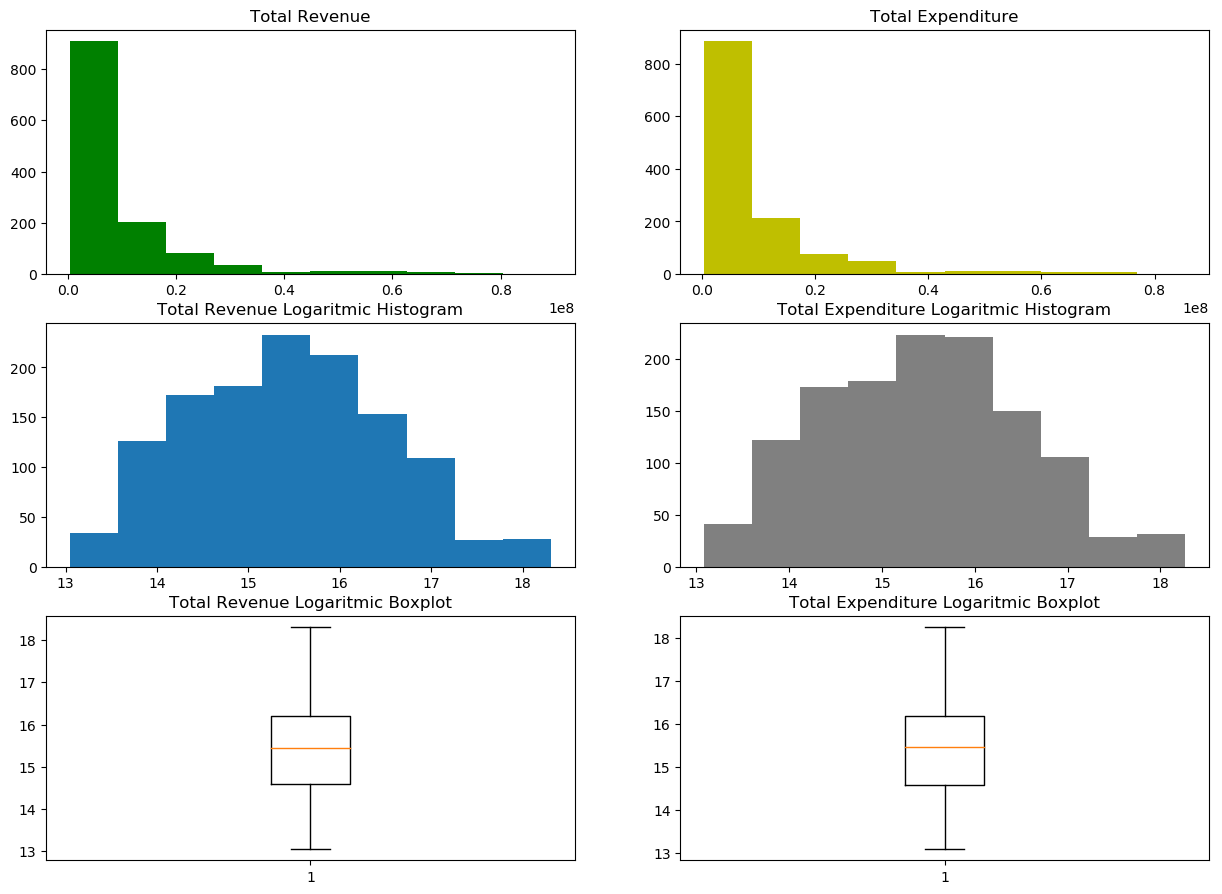

In [13]:
# LOG ALMA YÖNTEMİ İLE:
plt.figure(figsize=(15,11),dpi=100)
plt.subplot(3,2,1)
plt.title("Total Revenue")
plt.hist(states_all["TOTAL_REVENUE"],color="g")

plt.subplot(3,2,2)
plt.title("Total Expenditure")
plt.hist(states_all["TOTAL_EXPENDITURE"], color="y")

plt.subplot(3,2,3)
plt.title("Total Revenue Logaritmic Histogram")
plt.hist(np.log(states_all["TOTAL_REVENUE"]))

plt.subplot(3,2,4)
plt.title("Total Expenditure Logaritmic Histogram")
plt.hist(np.log(states_all["TOTAL_EXPENDITURE"]), color="grey")

plt.subplot(3,2,5)
plt.title("Total Revenue Logaritmic Boxplot")
plt.boxplot(np.log(states_all["TOTAL_REVENUE"]).dropna())

plt.subplot(3,2,6)
plt.title("Total Expenditure Logaritmic Boxplot")
plt.boxplot(np.log(states_all["TOTAL_EXPENDITURE"]).dropna())

# log yöntemi ile aykırı değerlerden arındırdıktan sonra histogram grafiği
# çizdikten sonra normal dağılım gösterdiği; boxplot grafiği ile de
# aykırı değerlerden arındığı anlaşılmıştır. Ayrıca winsorize metodu ile whisker
# uzunluğunu arttırınca da aykırı değerlerden kurtulmuş oluruz.
plt.show()

# Soru 3:
Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

C:\Users\afran\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()
C:\Users\afran\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


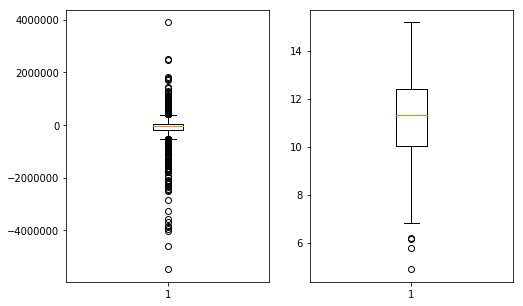

In [9]:
# Toplam gelirden toplam harcamaları çıkarınca kalan değerlerin outliers içerip
# içermediğini incele.

budget_deficit=pd.DataFrame(states_all["TOTAL_REVENUE"]-states_all["TOTAL_EXPENDITURE"]).reset_index()
budget_deficit=budget_deficit.rename(columns= {0:"Revenue_expenditure"})

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.boxplot(budget_deficit["Revenue_expenditure"].dropna())


# Gelir-harcama yaptığımızda elde edilen boxplot grafiğinde outliers değerlerin daha fazla olduğu
# görülmüştür. Outliers değerlerden kurtulmak için winsorize ya da log tekniği kullanılır.

plt.subplot(1,2,2)
budget_deficit_log=np.log(budget_deficit["Revenue_expenditure"])
plt.boxplot(np.log(budget_deficit["Revenue_expenditure"]).dropna())
# logaritması alındıktan sonra outliersların azaldığı görülmüştür.

plt.show()



# Soru 4:
Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

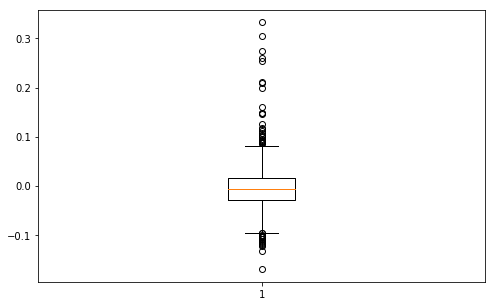

In [11]:
expe=np.log(states_all["TOTAL_EXPENDITURE"]).dropna()
revenue=np.log(states_all["TOTAL_REVENUE"]).dropna()

revenue_expe=pd.DataFrame(revenue-expe)
revenue_expe=revenue_expe.rename(columns={0:"revenue-expe"})

plt.figure(figsize=(8,5))
plt.boxplot(revenue_expe["revenue-expe"].dropna())
plt.show()

# Soru 5:
Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

3.örnekte öncelikle her iki kolonun farkını alıp ardından logaritmasını alarak aykırı değerlerden kurtardık. İki kolonun farkının logaritmasını çizdirdiğimizde aykırı değerlerin sayısı çok fazla azaldı.

Ancak 4. örnekte her kolonun önce ayrı ayrı logaritmasını alarak aykırı değerlerden kurtardık ardından aykırılıklardan kurtarılmış değişkenlerin farkının grafiğini çizdirdik. Bu durumda outliers değerlerin sayısı 3. metoda göre artmıştır.

# Soru 6:
If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

3. methoddaki outliers değerlerin sayısı 4. metoda göre çok daha az olduğu için 3. metodu seçmek daha doğru olacaktır.